In [20]:
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import jittor as jt
from jittor import nn
from model import RegressionModel
from dataset import RegressionDataset

np.random.seed(0)
jt.set_global_seed(0)
jt.flags.use_cuda = 1

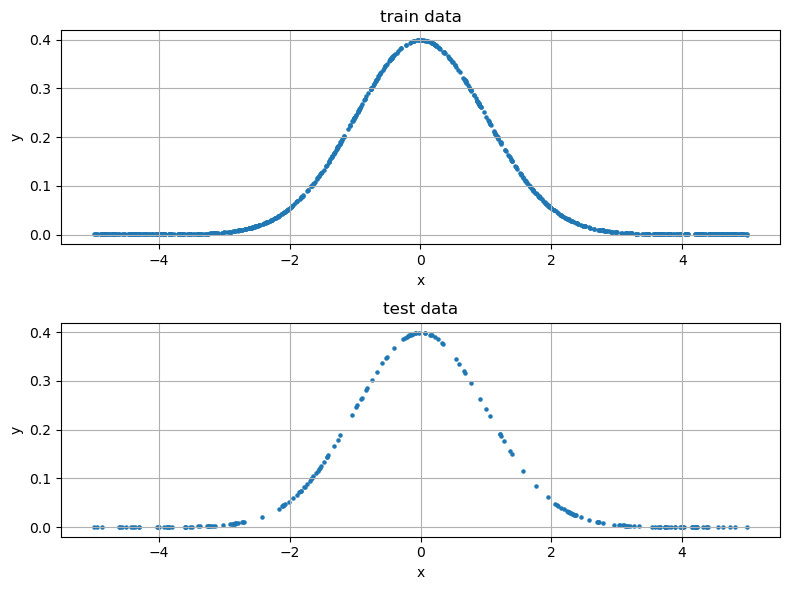

In [21]:
def guassian(x, mu=0, sigma=1):
    return np.exp(-(np.square(x - mu)) / (2 * np.square(sigma))) / (sigma * np.sqrt(2 * np.pi))

x = np.random.uniform(-5, 5, 1000)
y = guassian(x, mu=0, sigma=1)
x_train, y_train = x[:800], y[:800]
x_test, y_test = x[800:], y[800:]
with open('./dataset/train.pkl', 'wb') as file:
    pickle.dump((x_train, y_train), file)
with open('./dataset/test.pkl', 'wb') as file:
    pickle.dump((x_test, y_test), file)

plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.scatter(x_train, y_train, s=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('train data')
plt.grid()
plt.subplot(2, 1, 2)
plt.scatter(x_test, y_test, s=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('test data')
plt.grid()
plt.tight_layout()
plt.savefig('./figure/data.png')
plt.show()

In [22]:
loader_train = RegressionDataset('./dataset/train.pkl', batch=256)
loader_test = RegressionDataset('./dataset/test.pkl', batch=256)
model = RegressionModel()
loss_function = nn.MSELoss()
optimizer = jt.optim.Adam(model.parameters(), lr=1e-3)

total_epoch = 1000
loss_train, loss_test = [], []

for epoch in tqdm(range(1, total_epoch+1)):
    loss_epoch = 0
    model.train()
    for x, y in loader_train:
        y_hat = model(x)
        loss = loss_function(y_hat, y)
        optimizer.step(loss)
        loss_epoch += loss.data[0]
    loss_train.append(loss_epoch)
    
    loss_epoch = 0
    model.eval()
    with jt.no_grad():
        for x, y in loader_test:
            y_hat = model(x)
            loss = loss_function(y_hat, y)
            loss_epoch += loss.data[0]
    loss_test.append(loss_epoch)

100%|██████████| 1000/1000 [02:34<00:00,  6.46it/s]


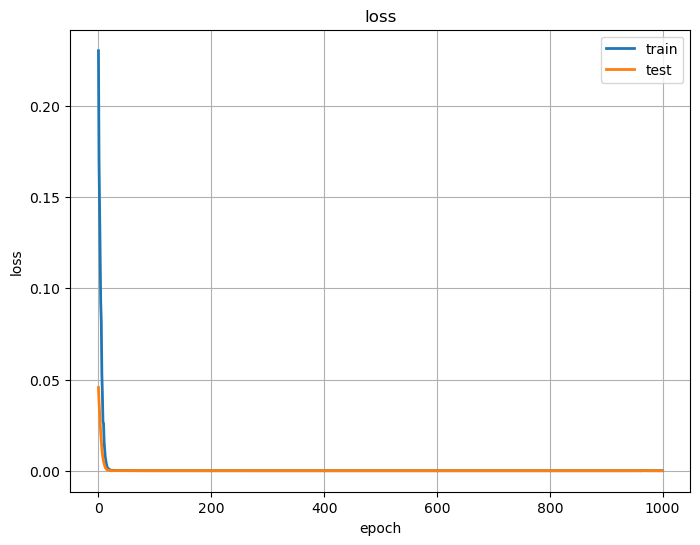

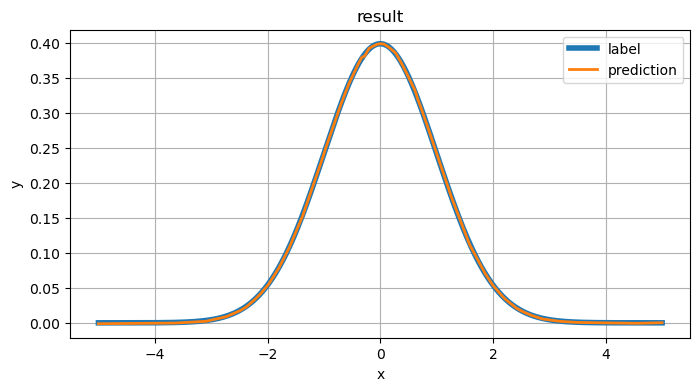

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(loss_train, label='train', linewidth=2)
plt.plot(loss_test, label='test', linewidth=2)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss')
plt.legend()
plt.grid()
plt.savefig('./figure/loss.png')
plt.show()

x = np.linspace(-5, 5, 1000)
y = guassian(x, mu=0, sigma=1)
y_hat = model(jt.array(x).reshape(-1, 1)).numpy()
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='label', linewidth=4)
plt.plot(x, y_hat, label='prediction', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('result')
plt.legend()
plt.grid()
plt.savefig('./figure/result.png')
plt.show()